# Pyber Challenge

# Overview
1. Create a ride-share summary DataFrame by city type
2. A multiple-line chart of total fares for each city type¶
3. Provide a written report for the PyBer Analisis (README.md)

## Loading and Reading CSV files
    
- Setting up the Depencies & CSV file


In [1]:
# Add Matplotlib inline magic command

%matplotlib inline

# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)

city_data_to_load = "PyBer_Analysis/city_data.csv"
ride_data_to_load = "PyBer_Analysis/ride_data.csv"

# Read the City and Ride Data

city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

- Total Rides for each city type
- Total Drivers by each city type
- Total amount of fares for each city type
- Average fare per ride for each city type
- Average fare per driver for each city type
- Create a PyBer summary DataFrame
- Cleaning up the DataFrame & Delete the index name
- Format the columns 


In [3]:
#  1. Get the total rides for each city type
total_ride_by_city = pyber_data_df.groupby(['type']).count()['ride_id']
total_ride_by_city

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [4]:
# 2. Get the total drivers for each city type
total_drivers_by_city = city_data_df.groupby(['type']).sum()['driver_count']
total_drivers_by_city

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [5]:
#  3. Get the total amount of fares for each city type
total_fare_by_city = pyber_data_df.groupby(['type']).sum()['fare']
total_fare_by_city

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [6]:
#  4. Get the average fare per ride for each city type. 
avg_fare_perride_by_city_type = total_fare_by_city / total_ride_by_city
avg_fare_perride_by_city_type

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [7]:
# 5. Get the average fare per driver for each city type. 
avg_fare_perdriver_by_city_type = total_fare_by_city / total_drivers_by_city
avg_fare_perdriver_by_city_type

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [8]:
#  6. Create a PyBer summary DataFrame. 
summary_df = pd.DataFrame()

summary_df['Total Rides'] = total_ride_by_city
summary_df['Total Drivers'] = total_drivers_by_city
summary_df['Total Fare'] = total_fare_by_city
summary_df['Avg Fare by Ride'] = avg_fare_perride_by_city_type
summary_df['Avg Fare per Driver'] = avg_fare_perdriver_by_city_type

summary_df



,Total Rides,Total Drivers,Total Fare,Avg Fare by Ride,Avg Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [9]:
#  7a. Cleaning up the DataFrame. Delete the index name
summary_df.dtypes

Total Rides              int64
Total Drivers            int64
Total Fare             float64
Avg Fare by Ride       float64
Avg Fare per Driver    float64
dtype: object

In [10]:
#  7b. Delete the index name
summary_df.index.name = None

In [11]:
#  8. Format the columns.

summary_df['Total Rides'] = summary_df['Total Rides'].map('{:,}'.format)
summary_df['Total Drivers'] = summary_df['Total Drivers'].map('{:,}'.format)
summary_df['Total Fare'] = summary_df['Total Fare'].map('{:,.2f}'.format)
summary_df['Avg Fare by Ride'] = summary_df['Avg Fare by Ride'].map('{:.2f}'.format)
summary_df['Avg Fare per Driver'] = summary_df['Avg Fare per Driver'].map('{:.2f}'.format)

summary_df


,Total Rides,Total Drivers,Total Fare,Avg Fare by Ride,Avg Fare per Driver
Rural,125,78,"4,327.93",34.62,55.49
Suburban,625,490,"19,356.33",30.97,39.50
Urban,"1,625","2,405","39,854.38",24.53,16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

1. Read the merged DataFrame
2. Using groupby() to create a new DataFrame showing the sum of the fares - for each date where the indices are the   city type and date.
3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.                 df = df.reset_index()
4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare'                         to get the total fares for each type of city by the date.
5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.          df.index = pd.to_datetime(df.index)
7. Check that the datatype for the index is datetime using df.info()
8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.






In [14]:
# 1. Read the merged DataFrame
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [17]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.

total_fare_by_city_and_date = pyber_data_df.groupby(['type', 'date']).sum()[['fare']]
total_fare_by_city_and_date

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [18]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
total_fare_by_city_and_date = total_fare_by_city_and_date.reset_index()
total_fare_by_city_and_date

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [20]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
total_fare_by_city_and_date = total_fare_by_city_and_date.pivot(index = 'date', columns = 'type', values='fare')
total_fare_by_city_and_date.head(10)

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
2019-01-01 09:45:36,43.69,NaN,NaN
2019-01-01 12:32:48,NaN,25.56,NaN
2019-01-01 14:40:14,NaN,NaN,5.42
2019-01-01 14:42:25,NaN,NaN,12.31


In [21]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

Dates_Jan_Apr_df = total_fare_by_city_and_date.loc['2019-01-01':'2019-04-29']
Dates_Jan_Apr_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [22]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

Dates_Jan_Apr_df.index = pd.to_datetime(Dates_Jan_Apr_df.index)
Dates_Jan_Apr_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [23]:
# 7. Check that the datatype for the index is datetime using df.info()
Dates_Jan_Apr_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [42]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.

Fares_for_each_weekd_df = Dates_Jan_Apr_df.resample('W').sum()
Fares_for_each_weekd_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


## Using the object-oriented interface method, plot the resample DataFrame                          using the df.plot() function. 

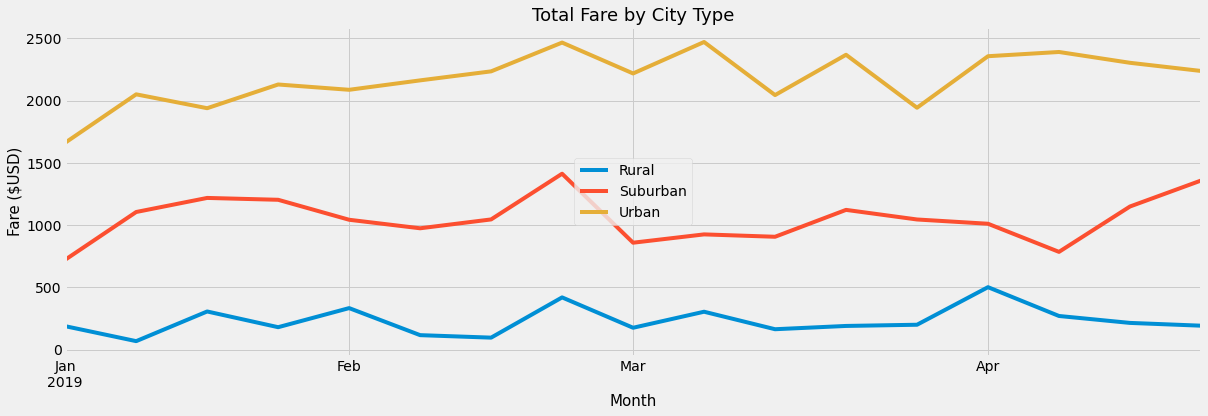

In [43]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

Fares_for_each_weekd_df.plot(figsize=(17, 6))

# Add graph properties

plt.title("Total Fare by City Type", fontsize=18)
plt.ylabel("Fare ($USD)", fontsize=15)
plt.xlabel("Month", fontsize=15)
plt.grid(True)

# Create a legend
plt.legend(bbox_to_anchor=(.50, .50), loc='center')
plt.tight_layout()

# Save figure.
plt.savefig("Analysis/PyBer_fare_summary.png")

# Show Figure
plt.show()
